# Extraindo as Letras da Discografia da Leigh Anne

Leigh-Anne Pinnock (Reino Unido, High Wycombe, 4 de outubro de 1991) é uma cantora, compositora, empresária, ativista e atriz britânica. Ela é mais conhecida por ser integrante do grupo feminino Little Mix. Pinnock ascendeu à fama ao participar da oitava temporada do *talent show The X Factor* no canal de televisão *ITV*.

Com o grupo a cantora venceu três *Brit Awards* incluindo o prêmio de Melhor Grupo Britânico - fazendo história na premiação tornando-se o primeiro grupo feminino a conseguir tal feito em 43 anos de premiação. A cantora em junto do grupo conseguiu uma fortuna de aproximadamente £66.7 milhões de libras esterlinas e ficaram na lista entre as maiores celebridades mais bem pagas de seu país (por quatro anos consecutivos desde 2016) segundo a revista *Debrette* elas se tornaram uma das personalidades de maior influência no Reino Unido. Além disso, vendeu mais de 75 milhões de discos em todo o mundo, fazendo delas um dos grupos femininos que mais venderam na história tornando-se também o grupo feminino britânico de maior sucesso do Reino Unido atrás apenas das Spice Girls e a girl group de mais sucesso da década de 2010.

Além da música, Pinnock é conhecida por seu ativismo na luta contra o racismo e, em 2020, recebeu o *Equality Award* por seu trabalho em prol da igualdade racial no Reino Unido. Em 2021, seu documentário *Leigh-Anne: Race, Pop & Power* foi indicado para "Melhor Documentário de Autor" no *26º National Television Awards*. Em dezembro de 2021, ela estreou como atriz no filme *Boxing Day*, que marcou a primeira rom-com festiva britânica a ser liderada por um elenco totalmente negro. Em 2019 ela lança sua própria marca de biquínis intitulado *In A Sea'shell*. Em 2021 ela lançou sua própria linha de cosméticos com a *Maybelline*.

Mais informações no link: https://pt.wikipedia.org/wiki/Leigh-Anne_Pinnock

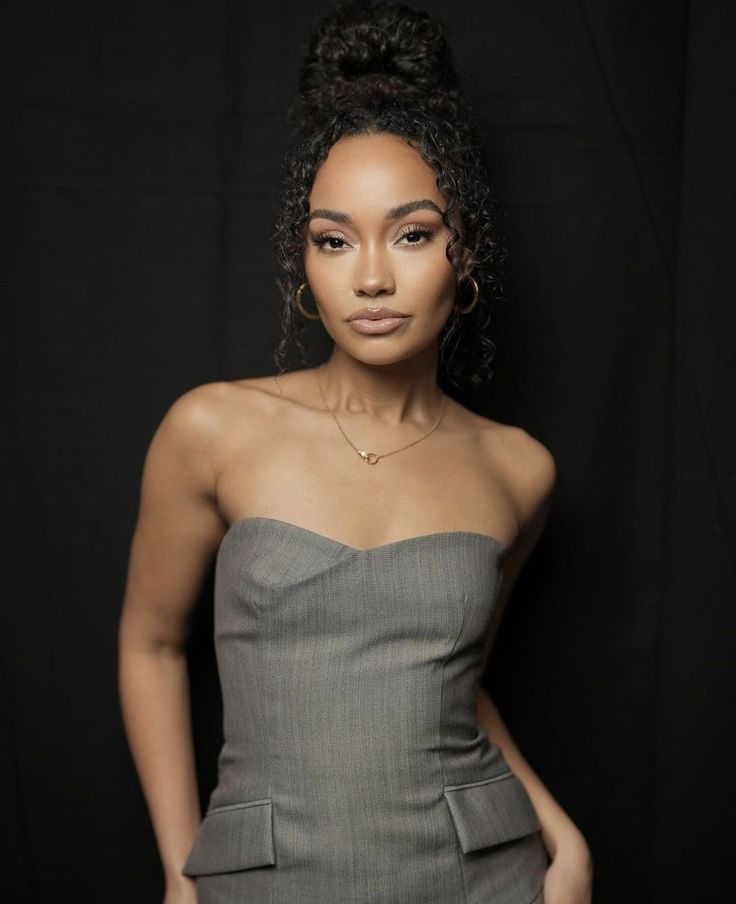



## API LyricsGenius

A API LyricsGenius é uma poderosa ferramenta que permite acessar uma vasta coleção de letras de músicas e informações sobre artistas. Desenvolvida pela Genius, uma plataforma conhecida por sua base de dados de letras e anotações, a API oferece funcionalidades que facilitam a busca por letras, detalhes de álbuns, informações sobre colaboradores e muito mais. Com suporte a consultas por nome de artista, título da música ou até mesmo trechos de letras, a API é especialmente útil para desenvolvedores que desejam integrar dados musicais em aplicativos e sites. Além disso, a API fornece recursos para obter anotações e interpretações das letras, enriquecendo a experiência do usuário ao explorar o significado das músicas. Através da LyricsGenius API, os amantes da música e os desenvolvedores podem aprofundar sua compreensão sobre as canções e seus criadores, trazendo um novo nível de interação com a música.

Mais informações e a documentação de como usar a API no link: https://docs.genius.com/

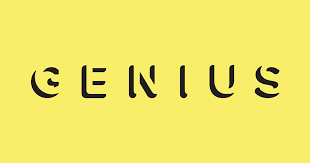

In [ ]:
import os
import pandas as pd
import requests
import lyricsgenius
import csv

# Chamada de Requisição
api_key = "YOUR_API_KEY"
genius = lyricsgenius.Genius(api_key)

# Busca do artista na API
artist = genius.search_artist("Leigh Anne", max_songs=10)

Searching for songs by Leigh Anne...

Changing artist name to 'Leigh-Anne'
Song 1: "Don’t Say Love"
Song 2: "My Love"
Song 3: "Stealin’ Love"
Song 4: "Forbidden Fruit"
Song 5: "OMG"
Song 6: "I’ll Still Be Here"
Song 7: "I Need You"
Song 8: "Anticipate"
Song 9: "Woman"
Song 10: "Nature"

Reached user-specified song limit (10).
Done. Found 10 songs.


In [ ]:
# Importando para um arquivo json
artist.save_lyrics()

Wrote Lyrics_LeighAnne.json.


In [ ]:
# Acessando as chaves principais dos dados contidos no arquivo JSON
data = json.load(open("Lyrics_LeighAnne.json", "r"))
data.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'followers_count', 'description_annotation', 'user', 'songs'])

In [ ]:
# Carregando dados em um dataframe e examinando os dados dentro de 'songs'
df = pd.DataFrame(data['songs'])
df.keys()

Index(['annotation_count', 'api_path', 'artist_names', 'full_title',
       'header_image_thumbnail_url', 'header_image_url', 'id',
       'lyrics_owner_id', 'lyrics_state', 'path', 'primary_artist_names',
       'pyongs_count', 'relationships_index_url', 'release_date_components',
       'release_date_for_display',
       'release_date_with_abbreviated_month_for_display',
       'song_art_image_thumbnail_url', 'song_art_image_url', 'stats', 'title',
       'title_with_featured', 'url', 'featured_artists', 'primary_artist',
       'primary_artists', 'apple_music_id', 'apple_music_player_url',
       'description', 'embed_content', 'featured_video', 'language',
       'recording_location', 'release_date', 'current_user_metadata',
       'song_art_primary_color', 'song_art_secondary_color',
       'song_art_text_color', 'album', 'custom_performances',
       'description_annotation', 'lyrics_marked_complete_by',
       'lyrics_marked_staff_approved_by', 'media', 'producer_artists',
     

In [ ]:
# Selecionando os dados úteis em um novo dataframe
df_oficial = df[['title', 'lyrics', 'release_date']].copy()

# Classificando as músicas pelo álbum
df_oficial['Album'] = df['album'].apply(lambda x: x.get('name') if isinstance(x, dict) else None)

# Eliminando músicas que não pertencem aos álbuns oficiais
df_oficial = df_oficial.drop(index=[6,8])

# Reseta o índice, se necessário
df_oficial.reset_index(drop=True, inplace=True)

# Convertendo a coluna 'release_date' para o formato de data
df_oficial['release_date'] = pd.to_datetime(df_oficial['release_date'], errors='coerce')

# Extraindo apenas o ano da coluna 'release_date' para armazenar na 'release_year'
df_oficial['release_year'] = df_oficial['release_date'].dt.year

# Exibindo o dataframe resultante
df_oficial

,title,lyrics,release_date,Album,release_year
0,Don’t Say Love,"[Intro]\n(Do say, do say, do say, do say)\n\n[...",2023-06-16,LA1*,2023
1,My Love,"[Verse 1: Leigh-Anne]\nLike dominoes, I can ma...",2023-09-07,LA1*,2023
2,Stealin’ Love,[Verse 1]\nWhy you even lie to yourself?\nI do...,2024-03-28,No Hard Feelings,2024
3,Forbidden Fruit,[Intro]\nThe way I'm lookin' at you\nWrong or ...,2024-05-03,No Hard Feelings,2024
4,OMG,"[Verse 1]\nSugar sweet, take a seat\nI'ma make...",2024-05-31,No Hard Feelings,2024
5,I’ll Still Be Here,[Intro]\nI'll still be— I'm not leaving\n\n[Ch...,2024-05-31,No Hard Feelings,2024
6,Anticipate,[Intro]\nOh\n\n[Verse 1]\nYour car is in the d...,2024-05-31,No Hard Feelings,2024
7,Nature,"[Intro]\nAh-yeah, yeah, yeah, yeah, ah-yeah\nA...",2024-06-12,No Hard Feelings,2024


In [ ]:
import nltk
from nltk.corpus import stopwords
import re

# Define uma função para remover stopwords de um texto
def remove_stopwords(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras que não estão na lista de stopwords em inglês
    text = [x for x in text if x not in stopwords.words('english')]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de stopwords em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_stopwords(x))

# Define uma função para remover pontuação do texto
def remove_ponctuation(text):
    # Usa uma expressão regular para manter apenas letras (maiúsculas e minúsculas) e junta as palavras em uma string
    return " ".join(re.findall("[a-zA-Z]+", text))

# Aplica a função de remoção de pontuação em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_ponctuation(x))

# Define uma função para remover palavras com menos de 3 caracteres do texto
def remove_words_with_less_3(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras com mais de 3 caracteres
    text = [x for x in text if len(x) > 3]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de palavras curtas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_words_with_less_3(x))

# Converte todo o texto em letras minúsculas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: x.lower())

# Cria uma nova coluna 'Word Count' no dataframe que conta o número de palavras em cada linha da coluna 'lyrics'
df_oficial['Word Count'] = df_oficial['lyrics'].apply(lambda x: len(x.split(' ')))

# Função para remover as palavras indesejadas
def remove_unwanted_words(text):
    words_to_remove = ["embed", "intro", "verse", "chorus", "outro", "instrumental"]
    pattern = r'\b(?:' + '|'.join(words_to_remove) + r')\b'
    return re.sub(pattern, '', text, flags=re.IGNORECASE)

# Aplicar a função na coluna de letras
df_oficial["lyrics"] = df_oficial["lyrics"].apply(remove_unwanted_words)

# Salvar o CSV atualizado
df_oficial.to_csv("LeighAnneLyrics.csv", index=False)

In [ ]:
import sqlite3

# Criando um banco de dados de teste
conn = sqlite3.connect('LeighAnne.db')

# Salvando no banco de dados
df_oficial.to_sql('lyrics', conn, index=False)

# Verificando se os dados estão presentes no banco de dados
c = conn.cursor()
c.execute('''
SELECT * FROM LYRICS
          ''')
# Visualização do Banco de Dados gerado
c.fetchall()

[('Don’t Say Love',
  '  myself gone myself gone wanna talk cannot pretend like perfect perfect  tell something wrong feel like myself strong wanna someone else somethin wrong gonna need help down life just  love that chasin empty lies empty words entertainment love need need need need somethin that real love that chasin truth might hurt know take love that chasin need need need need somethin that need somethin that need somethin that real  just take personal personal protect feelings anymore cannot pretend like perfect perfect  tell something wrong somethin wrong feel like myself strong strong wanna someone else somethin wrong somethin wrong gonna need help down life just  love that chasin empty lies empty words entertainment love need need need need somethin that real post  give somethin hold give somethin hold forever life gotta watch leave need need need need somethin that need somethin that need somethin that real bridge real need somethin that real need need need need somethin th